# Atividade 1 avaliativa de FPCC2 - 2023.1

### Aluno: Carlos Vinicius Alves Minervino

Fontes:  
[Repo Github](https://github.com/fpcc2-2023-1/fpcc2-lab1-viniciuscva)   
[Assignment Classrooom](https://classroom.google.com/c/NTQzNTcxNDI2NTg5/a/NTUzMDE2NTczMzQ3/details)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

In [16]:
dados = pd.read_csv('cursos-prouni.csv')
dados.head(2)

,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_id,curso_busca,cidade_busca,uf_busca,cidade_filtro,universidade_nome,campus_nome,campus_id,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,Bacharelado,Integral,9999.99,15.0,14.0,NaN,NaN,706710394154,Medicina,Campo Grande,MS,NTAwMjAwNDAyNzA0,Universidade Anhanguera - UNIDERP,CAMPO GRANDE - SEDE - Miguel Couto,706710,Medicina,740.22,726.46,NaN,NaN
1,Bacharelado,Noturno,9836.40,1.0,NaN,NaN,NaN,104191210567043,Enfermagem,Crateus,CE,MjMwNDAxODA0MTAz,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,1041912,Enfermagem,663.36,NaN,NaN,NaN


In [17]:
regioes_estados = {
    'norte': ['RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO'],
    'nordeste': ['MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA'],
    'centro-oeste': ['MT', 'MS', 'GO', 'DF'],
    'sudeste': ['MG', 'ES', 'RJ', 'SP'],
    'sul': ['PR', 'SC', 'RS']
}

estados_regioes = dict()
for regiao in regioes_estados:
    for uf in regioes_estados[regiao]:
        estados_regioes[uf] = regiao
        
def regiao(estado):
    return estados_regioes[estado]

In [18]:
regiao('PB')

'nordeste'

In [19]:
dados['regiao'] = dados['uf_busca'].apply(regiao)
dados.head(3)

,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_id,curso_busca,cidade_busca,...,cidade_filtro,universidade_nome,campus_nome,campus_id,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas,regiao
0,Bacharelado,Integral,9999.99,15.0,14.0,NaN,NaN,706710394154,Medicina,Campo Grande,...,NTAwMjAwNDAyNzA0,Universidade Anhanguera - UNIDERP,CAMPO GRANDE - SEDE - Miguel Couto,706710,Medicina,740.22,726.46,NaN,NaN,centro-oeste
1,Bacharelado,Noturno,9836.40,1.0,NaN,NaN,NaN,104191210567043,Enfermagem,Crateus,...,MjMwNDAxODA0MTAz,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,1041912,Enfermagem,663.36,NaN,NaN,NaN,nordeste
2,Bacharelado,Integral,9715.61,2.0,5.0,6.0,10.0,1002328574024,Medicina,Sao Paulo,...,MzUxNTA2MTUwMzA4,Universidade Cidade de São Paulo - UNICID,UNIVERSIDADE CIDADE DE SÃO PAULO - UNICID - SE...,1002328,Medicina,739.62,738.08,738.96,718.64,sudeste


## Q1 - Qual a diferença entre as mensalidades médias e medianas dos cursos de Ciência da Computação do Nordeste e Sudeste? Na sua opnião, essa diferença é estatisticamente significativa? Justifique.

In [24]:
dados['nome'][dados['nome'].str.contains('ompu')].unique()

array(['Engenharia de Computação', 'Ciência da Computação',
       'Engenharia da Computação', 'Redes de Computadores',
       'Ciências da Computação', 'Computação',
       'Gerenciamento de Redes de Computadores'], dtype=object)

In [25]:
def eh_CC(nome_curso):
    return nome_curso in ['Ciência da Computação',
                          'Ciências da Computação',
                          'Computação']

In [33]:
cursos_CC_NE_SE = dados.loc[ (dados['nome'].apply(eh_CC)) & ((dados['regiao']=='nordeste')|(dados['regiao']=='sudeste'))]
cursos_CC_NE_SE.head(2)

,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_id,curso_busca,cidade_busca,...,cidade_filtro,universidade_nome,campus_nome,campus_id,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas,regiao
171,Bacharelado,Integral,4023.0,2.0,2.0,NaN,NaN,6579541142864,Ciência da Computação,Rio de Janeiro,...,MzMwNjAxODA0NTU3,Pontifícia Universidade Católica do Rio de Jan...,CAMPUS GÁVEA - Gávea,657954,Ciência da Computação,689.72,705.00,NaN,NaN,sudeste
745,Bacharelado,Matutino,2016.0,1.0,3.0,NaN,NaN,657684189741,Ciência da Computação,Sao Paulo,...,MzUxNTA2MTUwMzA4,Universidade Presbiteriana Mackenzie - MACKENZIE,CAMPUS - SÃO PAULO - CONSOLAÇÃO - Consolação,657684,Ciência da Computação,707.98,680.08,NaN,NaN,sudeste


In [46]:
cursos_CC_NE_SE['mensalidade2'] = cursos_CC_NE_SE['mensalidade']

C:\Users\Vinicius32\AppData\Local\Temp\ipykernel_12004\3861294015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cursos_CC_NE_SE['mensalidade2'] = cursos_CC_NE_SE['mensalidade']


In [52]:
agg_function = {'mensalidade': 'mean', 'mensalidade2': 'median'}
media_mediana = cursos_CC_NE_SE.groupby('regiao', as_index=False)[['mensalidade', 'mensalidade2']].agg(agg_function).rename(
    columns={"mensalidade": "mensalidade média", "mensalidade2": "mensalidade mediana"})
media_mediana

,regiao,mensalidade média,mensalidade mediana
0,nordeste,693.208571,649.80
1,sudeste,837.163071,755.52


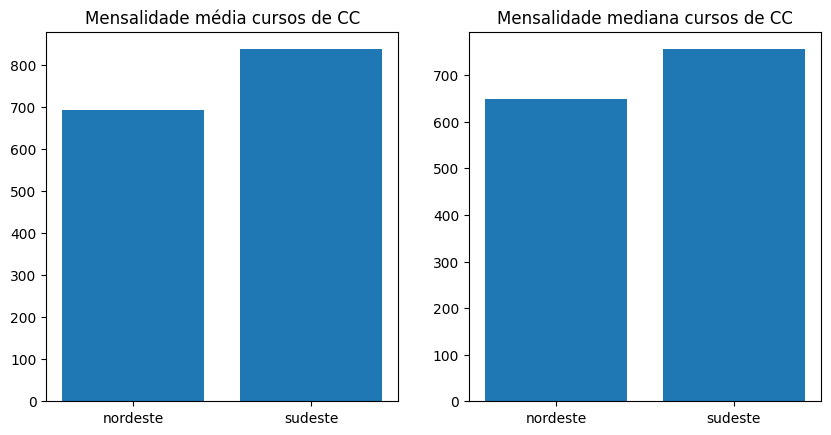

In [96]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(10)
axs[0].bar(media_mediana['regiao'], media_mediana['mensalidade média'])
axs[0].set_title('Mensalidade média cursos de CC')
axs[1].bar(media_mediana['regiao'], media_mediana['mensalidade mediana'])
axs[1].set_title('Mensalidade mediana cursos de CC')
plt.show()

#### Concluímos que a mensalidade média dos cursos de Ciência da Computação é maior no Sudeste, com uma diferença absoluta média de R$ 143,95.

#### Além disso, a mensalidade mediana também é maior no sudeste, com uma diferença absoluta na mediana de R$ 105,72.

## Q2 - Quais são os top 10 cursos com maior valor de mensalidade pelo total de bolsas (diferentes tipos)? Existe uma relação entre o valor total de mensalidade e o total de bolsas por curso? Justifique.

In [98]:
dados['total_bolsas'] = dados['bolsa_integral_cotas'].fillna(0) + \
            dados['bolsa_integral_ampla'].fillna(0) + dados['bolsa_parcial_cotas'].fillna(0) + dados['bolsa_parcial_ampla'].fillna(0)

In [100]:
dados.head(2)

,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_id,curso_busca,cidade_busca,...,universidade_nome,campus_nome,campus_id,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas,regiao,total_bolsas
0,Bacharelado,Integral,9999.99,15.0,14.0,NaN,NaN,706710394154,Medicina,Campo Grande,...,Universidade Anhanguera - UNIDERP,CAMPO GRANDE - SEDE - Miguel Couto,706710,Medicina,740.22,726.46,NaN,NaN,centro-oeste,29.0
1,Bacharelado,Noturno,9836.40,1.0,NaN,NaN,NaN,104191210567043,Enfermagem,Crateus,...,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,1041912,Enfermagem,663.36,NaN,NaN,NaN,nordeste,1.0


In [102]:
mais_caros = dados.sort_values('mensalidade', ascending = False).head(10)
mais_caros.head(2)

,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_id,curso_busca,cidade_busca,...,universidade_nome,campus_nome,campus_id,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas,regiao,total_bolsas
0,Bacharelado,Integral,9999.99,15.0,14.0,NaN,NaN,706710394154,Medicina,Campo Grande,...,Universidade Anhanguera - UNIDERP,CAMPO GRANDE - SEDE - Miguel Couto,706710,Medicina,740.22,726.46,NaN,NaN,centro-oeste,29.0
1,Bacharelado,Noturno,9836.40,1.0,NaN,NaN,NaN,104191210567043,Enfermagem,Crateus,...,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,1041912,Enfermagem,663.36,NaN,NaN,NaN,nordeste,1.0


In [105]:
bolsas_por_curso = mais_caros.groupby('nome', as_index=False)[['bolsa_integral_cotas', 'bolsa_integral_ampla',
                                                           'bolsa_parcial_cotas', 'bolsa_parcial_ampla']].sum()
bolsas_por_curso

,nome,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla
0,Enfermagem,1.0,0.0,0.0,0.0
1,Medicina,56.0,52.0,11.0,12.0
2,Psicologia,3.0,2.0,0.0,0.0


<AxesSubplot: xlabel='mensalidade', ylabel='total_bolsas'>

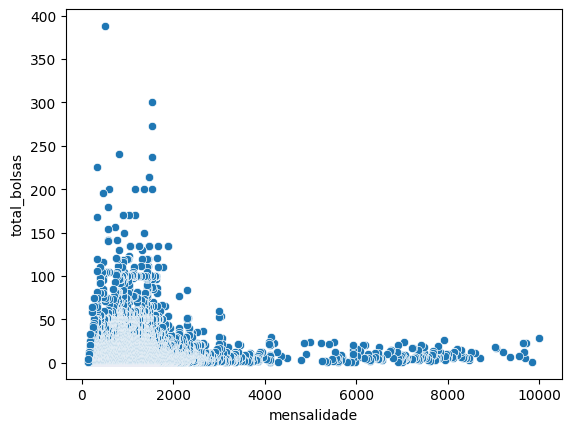

In [109]:
sea.scatterplot(data=dados, x="mensalidade", y="total_bolsas")

#### Não aparenta haver tal relação

## Q3 - Quais são os cursos tecnológicos da Paraíba que oferecem mais bolsas de estudo e quantas bolsas de cada tipo estes cursos oferecem?

In [121]:
tecnologicos_pb = dados.loc[ (dados['uf_busca']=='PB') & (dados['grau']=='Tecnológico')]
tecnologicos_pb.groupby('curso_busca', as_index=False)['bolsa_integral_cotas',
        'bolsa_integral_ampla','bolsa_parcial_cotas','bolsa_parcial_ampla','total_bolsas'].sum().sort_values('total_bolsas', ascending=False).head(10)

C:\Users\Vinicius32\AppData\Local\Temp\ipykernel_12004\872030433.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tecnologicos_pb.groupby('curso_busca', as_index=False)['bolsa_integral_cotas',


,curso_busca,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,total_bolsas
20,Gestão de Recursos Humanos,31.0,20.0,3.0,70.0,124.0
32,Segurança no Trabalho,11.0,7.0,1.0,91.0,110.0
30,Redes de Computadores,16.0,10.0,0.0,80.0,106.0
18,Gestão da Tecnologia da Informação,12.0,6.0,1.0,80.0,99.0
26,Negócios Imobiliários,6.0,4.0,0.0,85.0,95.0
24,Logística,9.0,3.0,1.0,67.0,80.0
29,Radiologia,12.0,30.0,1.0,10.0,53.0
5,Design de Interiores,13.0,10.0,0.0,30.0,53.0
25,Marketing,15.0,8.0,4.0,0.0,27.0
12,Gestão Comercial,14.0,5.0,5.0,3.0,27.0


## Q4 - Considerando os cursos de Ciência da Computação, Engenharia da Computação e Sistemas de Informação, qual o percentual de bolsas ofertadas para cada modalidade (a distância, integral, noturno, etc.) por cada um dos cursos? Existe uma modalidade que é predominante?

In [123]:
dados['nome'][dados['nome'].str.contains('ompu')].unique()

array(['Engenharia de Computação', 'Ciência da Computação',
       'Engenharia da Computação', 'Redes de Computadores',
       'Ciências da Computação', 'Computação',
       'Gerenciamento de Redes de Computadores'], dtype=object)

In [122]:
dados['nome'][dados['nome'].str.contains('nforma')].unique()

array(['Gestão da Tecnologia da Informação', 'Sistema de Informação',
       'Sistemas de Informação', 'Segurança da Informação'], dtype=object)

In [126]:
def cc_ec_si(nome_curso):
    return nome_curso in ['Engenharia de Computação', 
                           'Ciência da Computação',
                           'Engenharia da Computação', 
                           'Ciências da Computação', 
                           'Computação',
                           'Sistema de Informação',
                           'Sistemas de Informação']

In [127]:
df_cc_ec_si = dados.loc[dados['nome'].apply(cc_ec_si)]

In [133]:
df_cc_ec_si.loc[ (df_cc_ec_si['nome']=='Ciências da Computação')|(df_cc_ec_si['nome']=='Computação'), 'nome' ] = 'Ciência da Computação'
df_cc_ec_si.loc[ df_cc_ec_si['nome']=='Engenharia de Computação', 'nome'] = 'Engenharia da Computação'
df_cc_ec_si.loc[ df_cc_ec_si['nome']=='Sistema de Informação', 'nome'] = 'Sistemas de Informação'

In [134]:
df_cc_ec_si.turno.unique()

array(['Noturno', 'Integral', 'Matutino', 'Vespertino',
       'Curso a Distância'], dtype=object)

In [138]:
cc_ec_si_turnos = df_cc_ec_si.groupby(['nome','turno'], as_index=False)['total_bolsas'].sum()
cc_ec_si_cursos = df_cc_ec_si.groupby(['nome'])['total_bolsas'].sum()

In [139]:
cc_ec_si_cursos

nome
Ciência da Computação       1728.0
Engenharia da Computação    1233.0
Sistemas de Informação      2591.0
Name: total_bolsas, dtype: float64

In [137]:
cc_ec_si_turnos

,nome,turno,total_bolsas
0,Ciência da Computação,Curso a Distância,20.0
1,Ciência da Computação,Integral,20.0
2,Ciência da Computação,Matutino,437.0
3,Ciência da Computação,Noturno,1234.0
4,Ciência da Computação,Vespertino,17.0
5,Engenharia da Computação,Curso a Distância,132.0
6,Engenharia da Computação,Integral,65.0
7,Engenharia da Computação,Matutino,421.0
8,Engenharia da Computação,Noturno,597.0
9,Engenharia da Computação,Vespertino,18.0


In [142]:
def obter_total_bolsas(nome):
    return cc_ec_si_cursos[nome]

In [145]:
cc_ec_si_turnos['bolsas_do_curso_na_modalidade(%)'] = 100*cc_ec_si_turnos['total_bolsas']/cc_ec_si_turnos['nome'].apply(obter_total_bolsas)
cc_ec_si_turnos

,nome,turno,total_bolsas,perc_bolsas_do_curso_na_modalidade,bolsas_do_curso_na_modalidade(%)
0,Ciência da Computação,Curso a Distância,20.0,1.157407,1.157407
1,Ciência da Computação,Integral,20.0,1.157407,1.157407
2,Ciência da Computação,Matutino,437.0,25.289352,25.289352
3,Ciência da Computação,Noturno,1234.0,71.412037,71.412037
4,Ciência da Computação,Vespertino,17.0,0.983796,0.983796
5,Engenharia da Computação,Curso a Distância,132.0,10.705596,10.705596
6,Engenharia da Computação,Integral,65.0,5.271695,5.271695
7,Engenharia da Computação,Matutino,421.0,34.144363,34.144363
8,Engenharia da Computação,Noturno,597.0,48.418491,48.418491
9,Engenharia da Computação,Vespertino,18.0,1.459854,1.459854


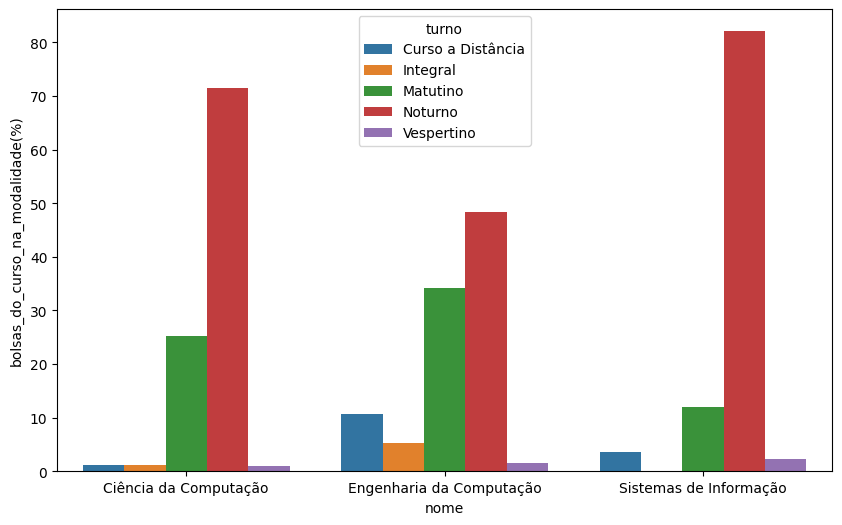

In [149]:
plt.figure(figsize=(10,6))
sea.barplot(x = 'nome', y = 'bolsas_do_curso_na_modalidade(%)', hue='turno', data=cc_ec_si_turnos)
plt.show()

#### Podemos ver facilmente que a modalidade 'Noturno' é predominante e geralmente possui mais bolsas.